# IXPE reconstruction with CNN

The model used is a Convolutional Neural Network (CNN), tipically used in pattern recognition. In this case it is used for a REGRESSION problem: we want to get a contunous parameter (energy, polarization angle, impact position) from an image (the charge collected by the pixel detector).

<img src="LocalizationRegression2.png" width="500">




THE MODEL:

<img src="CNN_scheme.png" width="500">

CONV, POOLING, ACTIVATION:
<img src="CONV_POOL.png" width="300">

LEARNING MINIMIZING THE LOSS FUNCTION:
<img src="loss_min.png" width="300"><img src="Filters.png" width="200">

## Energy reconstruction

THE SAMPLE:   

    Normalized images --> not good to generalize to every sample!
    Powerlaw spectrum (uniform distribution would be better...)
    Train: ~9000 events
    Test: ~800 events
    Epochs: 200


MODEL PERFORMANCE:
<img src="EN_perf.png" width="400">

In [2]:
import numpy as np
import pickle as pic
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import model_from_json
from keras import optimizers

Using TensorFlow backend.
/Users/mnegro/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# load model file
json_file_en = open('model_ENE_powerlaw_nopol.json', 'r')
loaded_model_json_en = json_file_en.read()
json_file_en.close()
loaded_model_en = model_from_json(loaded_model_json_en)

# load weights into new model
loaded_model_en.load_weights("model_ENE_powerlaw_nopol.h5")
print("Loaded model from disk")

Loaded model from disk


In [3]:
f_images = '../sim500000_powerlaw_nopol_images2.pkl'
f_labels = '../sim500000_powerlaw_nopol_labels2.pkl'

with open(f_images, 'rb') as f:
    images = pic.load(f)
with open(f_labels, 'rb') as ff:
    labels = pic.load(ff)
    
index_clean = np.where(labels[:,0] != -1000.)[0]
images_test = images[index_clean]
images_test = images_test[int(len(images)*0.9):]
labels_test = labels[index_clean][:,0]
labels_test = labels_test[int(len(images)*0.9):]
(img_rows, img_cols) = images_test[0].shape
images_test = images_test.reshape(len(images_test), 1, img_rows, img_cols)

In [4]:
# evaluate loaded model on test data
optimizers.Adam(lr=0.001, decay=0.0, amsgrad=True)
loaded_model_en.compile(loss='mean_squared_error', optimizer='adam')
score = loaded_model_en.evaluate(images_test, labels_test, batch_size=16)
print(score)

781/781 [==============================] - 0s 311us/step
0.167000459762


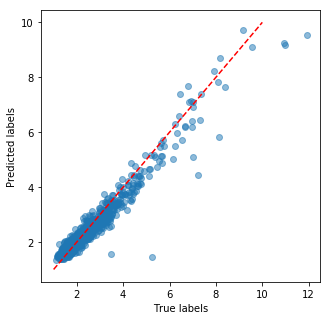

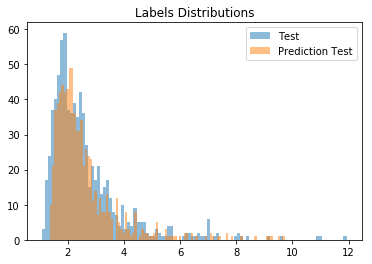

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(labels_test, loaded_model_en.predict(images_test), alpha=0.5)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.plot([1, 10],[1, 10], 'r--')

plt.figure()
plt.hist(labels_test, bins=100, alpha=0.5, label='Test')
plt.hist(loaded_model_en.predict(images_test), bins=100, alpha=0.5, 
         label='Prediction Test')   
plt.title('Labels Distributions')
plt.legend()
plt.show()



## Polarization angle reconstruction

THE SAMPLE:   
 
    Train: ~4000 events
    Test: ~500 events
    epochs: 1000

MODEL PERFORMANCE:

<img src="PHI_perf.png" width="400">

In [8]:
f_images = '../sim_images2.pkl'
f_labels = '../sim_labels2.pkl'

with open(f_images, 'rb') as f:
    images = pic.load(f)
with open(f_labels, 'rb') as ff:
    labels = pic.load(ff)
    
index_clean = np.where(labels[:,0] != -1000.)[0]
images_test = images[index_clean]
labels_test = np.sin(labels[index_clean][:,-1])
(img_rows, img_cols) = images_test[0].shape
images_test = images_test.reshape(len(images_test), 1, img_rows, img_cols)

In [9]:
# load model file
json_file = open('model_PHI_5KeV_nopol_sin.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_PHI_5KeV_nopol_sin.h5")
print("Loaded model from disk")

Loaded model from disk


In [10]:
# evaluate loaded model on test data
optimizers.Adam(lr=0.001, decay=0.0, amsgrad=True)
loaded_model.compile(loss='mean_squared_error', optimizer='adam')
score = loaded_model.evaluate(images_test, labels_test, batch_size=16)
print(score)

2258/2258 [==============================] - 2s 713us/step
0.403169423104


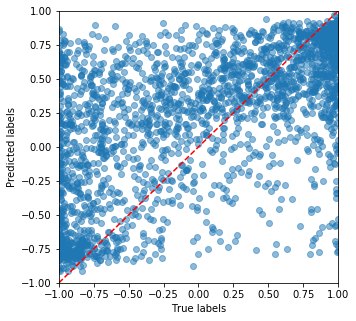

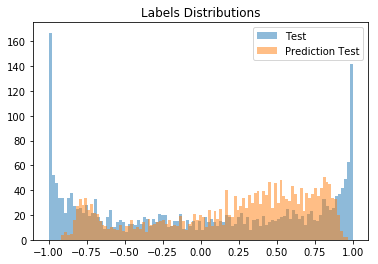

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(labels_test, loaded_model.predict(images_test), alpha=0.5)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.plot([-np.pi, np.pi],[-np.pi, np.pi], 'r--')
plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.figure()
plt.hist(labels_test, bins=100, alpha=0.5, label='Test')
plt.hist(loaded_model.predict(images_test), bins=100, alpha=0.5, label='Prediction Test')   
plt.title('Labels Distributions')
plt.legend()

plt.show()